In [32]:
import pandas as pd
pd.set_option("display.max_columns", 150)
import sqlite3
import glob
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Importing all the files
csv_files = glob.glob('../data/trips/*.csv')

# List to collect DataFrames
dataframes = []


for csv_file in csv_files:
    df = pd.read_csv(csv_file, low_memory=False)
    dataframes.append(df)

citibike = pd.concat(dataframes, ignore_index=True)


citibike  = citibike.drop(columns = 'Unnamed: 0') 
citibike = citibike.sort_values('date').reset_index(drop = True)

In [3]:
citibike['date'] = pd.to_datetime(citibike['date'])
citibike['year'] = pd.to_datetime(citibike['date']).dt.year
citibike['month'] = pd.to_datetime(citibike['date']).dt.month


In [29]:
citibike['day_of_week'] = citibike['day_of_week'].astype(str)

In [5]:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

citibike['season'] = citibike['date'].apply(get_season)

In [ ]:
citibike.groupby('day_of_week')['num_of_trips'].sum().sort_values(ascending = False)

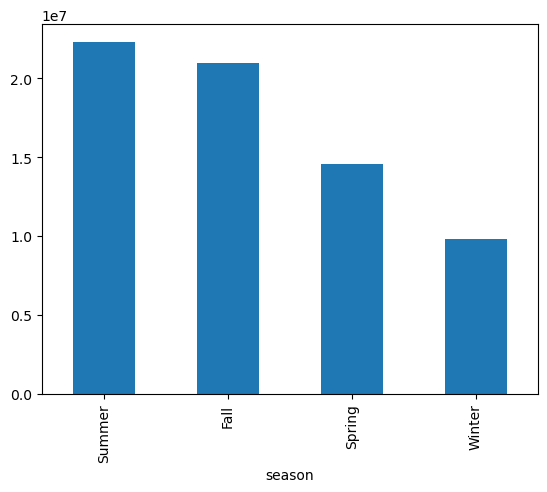

In [23]:
citibike.groupby('season')['num_of_trips'].sum().sort_values(ascending = False).plot.bar();

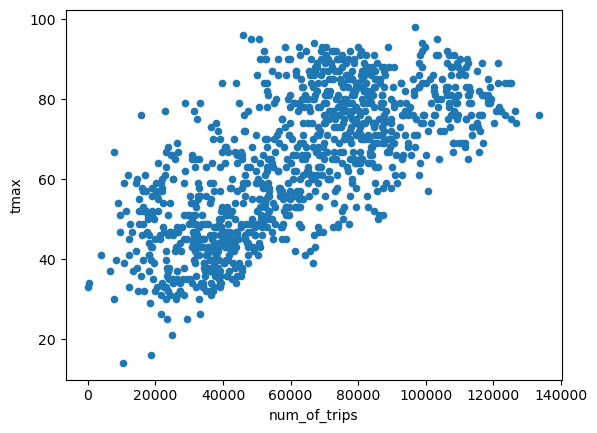

In [24]:
citibike.plot.scatter(x = 'num_of_trips', y = 'tmax')
plt.show()

In [ ]:
citibike[['num_of_trips', 'tmax']].corr()

In [35]:
citibike.groupby('day_of_week')['num_of_trips'].sum()

day_of_week
0     9160499
1     9985986
2    10118289
3     9734578
4     9916249
5    10018821
6     8785583
Name: num_of_trips, dtype: int64

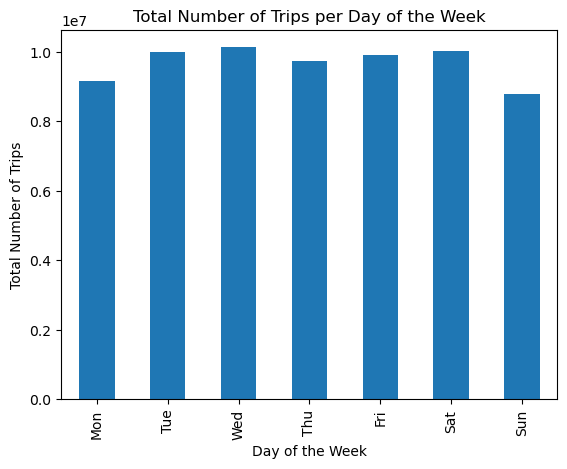

In [25]:
citibike.groupby('day_of_week')['num_of_trips'].sum().plot.bar()


plt.title('Total Number of Trips per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Number of Trips')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


plt.show()

In [11]:
citibike

,date,num_of_trips,holiday,prcp,snow,tmax,tmin,median_trip_duration,mean_trip_duration,day_of_week,year,month,season
0,2019-01-01,21962,True,15,0.0,57.92,39.02,663.0,1175.93,1,2019,1,Winter
1,2019-01-02,37797,False,0,0.0,39.92,35.06,548.0,780.93,2,2019,1,Winter
2,2019-01-03,41676,False,0,0.0,44.06,37.04,533.0,769.52,3,2019,1,Winter
3,2019-01-04,43922,False,0,0.0,46.94,35.06,535.0,778.15,4,2019,1,Winter
4,2019-01-05,17432,False,127,0.0,46.94,41.00,476.0,811.47,5,2019,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2021-12-27,31583,False,23,0.0,39.02,33.98,511.0,1452.87,0,2021,12,Winter
1091,2021-12-28,40728,False,13,0.0,46.94,35.96,574.0,1614.75,1,2021,12,Winter
1092,2021-12-29,39656,False,36,0.0,44.06,41.00,558.0,1450.41,2,2021,12,Winter
1093,2021-12-30,46925,False,13,0.0,48.92,42.98,587.0,1507.32,3,2021,12,Winter


linear Regression Time 

In [14]:
lm = smf.ols('num_of_trips ~ tmax', data = citibike).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           num_of_trips   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     1080.
Date:                Tue, 28 May 2024   Prob (F-statistic):          2.52e-165
Time:                        21:11:50   Log-Likelihood:                -12389.
No. Observations:                1095   AIC:                         2.478e+04
Df Residuals:                    1093   BIC:                         2.479e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.028e+04   2275.070     -4.521      0.000   -1.47e+04   -5820.870
tmax        1133.6926     34.492     32.868      0.000    1066.014    1201.371
==============================================================================
Omnibus:                        0.215   Durbin-Watson:                   0.661
Prob(Omnibus):                  0.898   Jarque-Bera (JB):                0.288
Skew:                           0.020   Prob(JB):                        0.866
Kurtosis:                       2.932   Cond. No.                         250.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

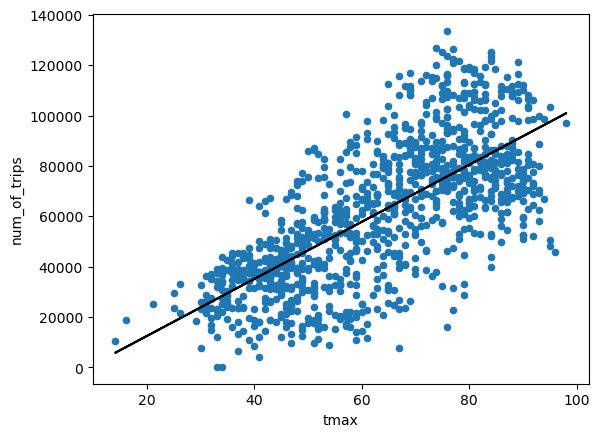

In [15]:
citibike.plot(x = 'tmax', y = 'num_of_trips', kind = 'scatter')
plt.plot(citibike['tmax'], lm.fittedvalues, color = 'black');

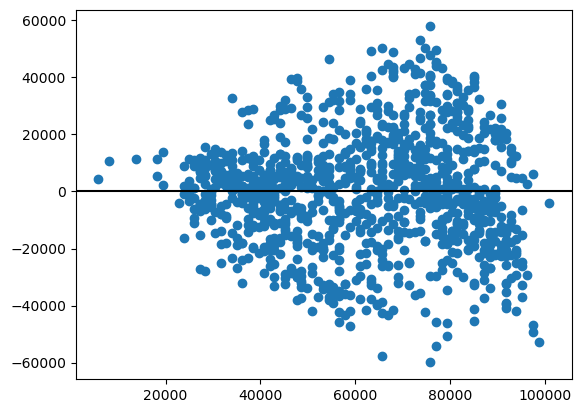

In [16]:
plt.scatter(lm.fittedvalues, lm.resid)
xmin, xmax = plt.xlim()
plt.hlines(y = 0, xmin = xmin, xmax = xmax, color = 'black')
plt.xlim(xmin, xmax);

In [34]:
lm = smf.ols('num_of_trips ~ + season + day_of_week + tmax', data = citibike).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           num_of_trips   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     149.8
Date:                Tue, 28 May 2024   Prob (F-statistic):          2.29e-196
Time:                        22:28:54   Log-Likelihood:                -12290.
No. Observations:                1095   AIC:                         2.460e+04
Df Residuals:                    1084   BIC:                         2.466e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2417.6807   4001.324      0.604      0.546   -5433.537    1.03e+04
season[T.Spring]  -1.95e+04   1572.237    -12.402      0.000   -2.26e+04   -1.64e+04
season[T.Summer] -1.539e+04   1836.395     -8.380      0.000    -1.9e+04   -1.18e+04
season[T.Winter] -1.631e+04   1987.846     -8.204      0.000   -2.02e+04   -1.24e+04
day_of_week[T.1]  5261.1032   2062.881      2.550      0.011    1213.411    9308.795
day_of_week[T.2]  5876.1879   2059.789      2.853      0.004    1834.562    9917.813
day_of_week[T.3]  3417.2359   2059.797      1.659      0.097    -624.405    7458.876
day_of_week[T.4]  4434.1784   2059.743      2.153      0.032     392.643    8475.714
day_of_week[T.5]  5728.3224   2062.879      2.777      0.006    1680.635    9776.010
day_of_week[T.6] -2450.0150   2062.938     -1.188      0.235   -6497.819    1597.788
tmax              1085.3986     54.990     19.738      0.000     977.500    1193.297
==============================================================================
Omnibus:                        1.182   Durbin-Watson:                   0.749
Prob(Omnibus):                  0.554   Jarque-Bera (JB):                1.110
Skew:                          -0.076   Prob(JB):                        0.574
Kurtosis:                       3.034   Cond. No.                         562.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""